**Reading and Understanding the Data**

In [33]:
#importing libaries
import pandas as pd
import numpy as np

#data visualization libaries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from urllib.request import urlopen
import json

#model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler



In [9]:
all_data = pd.read_csv('/content/drive/MyDrive/Perth Housing.csv')
all_data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113
1,1 Ashcott Gate,Butler,367500,3,2,2,398,158,2003,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39
2,1 August Court,Bull Creek,685000,3,2,3,706,196,1985,12500,Murdoch Station,961,11-2017\r,6149,-32.064580,115.860460,LEEMING SENIOR HIGH SCHOOL,1.183363,89
3,1 Babbler Court,Maida Vale,570000,4,2,2,568,225,2003,15300,Midland Station,7000,10-2020\r,6057,-31.952420,116.020700,DARLING RANGE SPORTS COLLEGE,2.746772,137
4,1 Barcroft Court,Atwell,465000,4,2,2,450,173,2000,20700,Cockburn Central Station,1600,08-2017\r,6164,-32.137680,115.866970,ATWELL COLLEGE,0.747108,129


In [10]:
#display attribute information
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           9733 non-null   object 
 1   SUBURB            9733 non-null   object 
 2   PRICE             9733 non-null   int64  
 3   BEDROOMS          9733 non-null   int64  
 4   BATHROOMS         9733 non-null   int64  
 5   GARAGE            9733 non-null   int64  
 6   LAND_AREA         9733 non-null   int64  
 7   FLOOR_AREA        9733 non-null   int64  
 8   BUILD_YEAR        9733 non-null   int64  
 9   CBD_DIST          9733 non-null   int64  
 10  NEAREST_STN       9733 non-null   object 
 11  NEAREST_STN_DIST  9733 non-null   int64  
 12  DATE_SOLD         9733 non-null   object 
 13  POSTCODE          9733 non-null   int64  
 14  LATITUDE          9733 non-null   float64
 15  LONGITUDE         9733 non-null   float64
 16  NEAREST_SCH       9733 non-null   object 


In [11]:
print(all_data.describe())

              PRICE     BEDROOMS    BATHROOMS       GARAGE      LAND_AREA  \
count  9.733000e+03  9733.000000  9733.000000  9733.000000    9733.000000   
mean   7.000872e+05     3.686839     1.864584     2.185246    2155.439536   
std    3.873849e+05     0.755272     0.594668     1.187386   10055.826320   
min    5.450000e+04     1.000000     1.000000     1.000000      61.000000   
25%    4.350000e+05     3.000000     2.000000     2.000000     494.000000   
50%    5.850000e+05     4.000000     2.000000     2.000000     676.000000   
75%    8.500000e+05     4.000000     2.000000     2.000000     809.000000   
max    2.425000e+06     9.000000     7.000000    22.000000  405000.000000   

        FLOOR_AREA   BUILD_YEAR      CBD_DIST  NEAREST_STN_DIST     POSTCODE  \
count  9733.000000  9733.000000   9733.000000       9733.000000  9733.000000   
mean    187.699065  1988.922737  18317.496250       4195.541457  6086.143532   
std      73.200206    21.752706  10989.642686       4202.432155   

In [12]:
num_rows, num_columns = all_data.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 9733
Number of Columns: 19


In [13]:
all_data.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [14]:
all_data.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

In [15]:
#replace float dtype to int dtype in GARAGE and BUILD_YEAR
cols = ['GARAGE', 'BUILD_YEAR']
all_data[cols] = all_data[cols].applymap(np.int64)

#remove '\r' from DATE_SOLD values and formate it to datetime type
all_data['DATE_SOLD'] = all_data['DATE_SOLD'].str.replace('\r', '')
all_data['DATE_SOLD'] = pd.to_datetime(all_data['DATE_SOLD'])

all_data.dtypes

ADDRESS                     object
SUBURB                      object
PRICE                        int64
BEDROOMS                     int64
BATHROOMS                    int64
GARAGE                       int64
LAND_AREA                    int64
FLOOR_AREA                   int64
BUILD_YEAR                   int64
CBD_DIST                     int64
NEAREST_STN                 object
NEAREST_STN_DIST             int64
DATE_SOLD           datetime64[ns]
POSTCODE                     int64
LATITUDE                   float64
LONGITUDE                  float64
NEAREST_SCH                 object
NEAREST_SCH_DIST           float64
NEAREST_SCH_RANK             int64
dtype: object

**Finding strong correlations**

In [16]:
num_cols = list(all_data.select_dtypes(['int64', 'float64']))
print('Numerical Cols: ', num_cols,'\n')

cat_cols = list(all_data.select_dtypes(['object', 'datetime64[ns]']))
print('Object Cols:', cat_cols)

Numerical Cols:  ['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'] 

Object Cols: ['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH']


In [17]:
corr_matrix = all_data[num_cols].corr().round(1)

print(corr_matrix['PRICE'].sort_values(ascending=False))

heat_map_fig = px.imshow(corr_matrix, template="seaborn", text_auto=True)

heat_map_fig.update_layout(xaxis_rangeslider_visible=False,
                      autosize=False,
                      width=1150,
                      height=700,
                      title={
                            'text': "Correlation of Numerical Variables"}
                    )

heat_map_fig.show()

PRICE               1.0
FLOOR_AREA          0.6
BATHROOMS           0.4
BEDROOMS            0.3
GARAGE              0.1
LAND_AREA           0.0
LATITUDE            0.0
NEAREST_STN_DIST   -0.1
NEAREST_SCH_DIST   -0.1
BUILD_YEAR         -0.2
POSTCODE           -0.2
LONGITUDE          -0.2
CBD_DIST           -0.4
NEAREST_SCH_RANK   -0.5
Name: PRICE, dtype: float64


Conclusions:

*   Have corr with PRICE(>0.2): BATHROOMS, BEDROOMS, FLOOR_AREA
*   Have small corr(>=0.1): GARAGE
*   No corr(<=0): NEAREST_SCH_DIST, NEAREST_STN_DIST, BUILD_YEAR, POSTCODE,
     LONGITUDE, CBD_DIST, NEAREST_SCH_RANK, LATITUDE,LAND,AREA
     


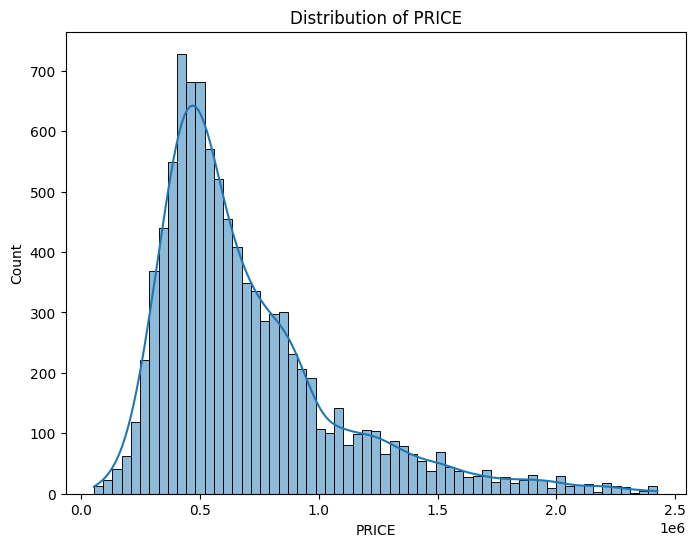

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(all_data["PRICE"], kde=True)
plt.title("Distribution of PRICE")
plt.show()

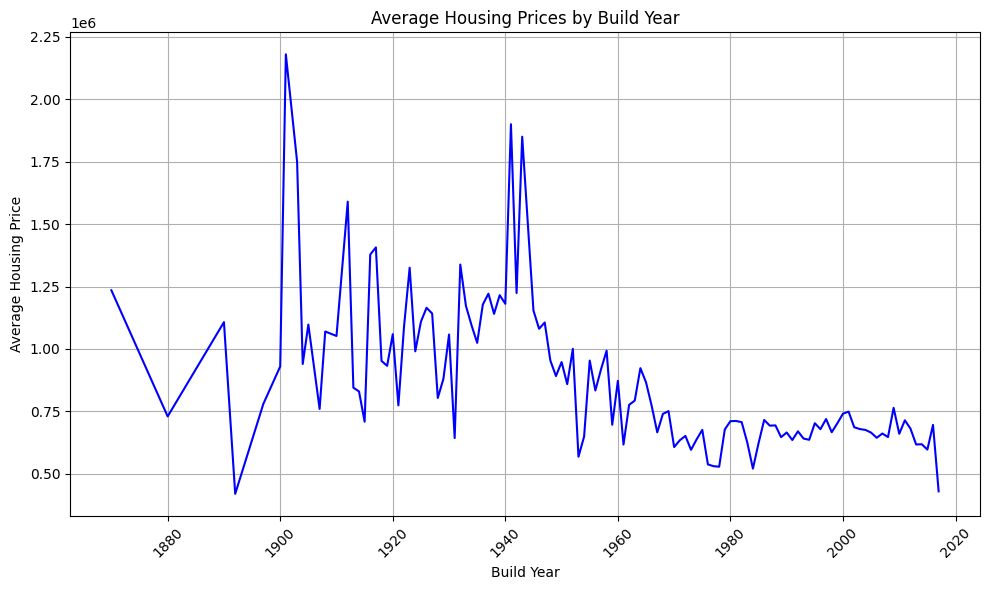

In [19]:
# Extract relevant columns
build_year = all_data['BUILD_YEAR']
prices = all_data['PRICE']

# Calculate average prices for each build year
average_prices_by_year = all_data.groupby('BUILD_YEAR')['PRICE'].mean()

# Create a line plot for average prices by build year
plt.figure(figsize=(10, 6))
plt.plot(average_prices_by_year.index, average_prices_by_year.values, marker='', color='blue')
plt.xlabel('Build Year')
plt.ylabel('Average Housing Price')
plt.title('Average Housing Prices by Build Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Visualizing Geographical Data


with urlopen('https://raw.githubusercontent.com/tonywr71/GeoJson-Data/master/australian-states.json') as response:
    australia = json.load(response)

info = geo_df = all_data[['LATITUDE', 'LONGITUDE', 'PRICE', 'ADDRESS', 'POSTCODE']]

fig = px.scatter_mapbox(info, lat='LATITUDE', lon='LONGITUDE', hover_name='ADDRESS',
    hover_data=['POSTCODE'], color='PRICE',
    zoom=8, height=500, width=1150)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":1,"l":1,"b":1})
fig.show()

In [21]:
# Summary:

# Homes with prices above $1.5 million are situated close to the ocean and in the center of Perth

# Houses under $0.5 million are located closer to the right side of town or, in general, outside of Perth center

# Price is affected by the population density

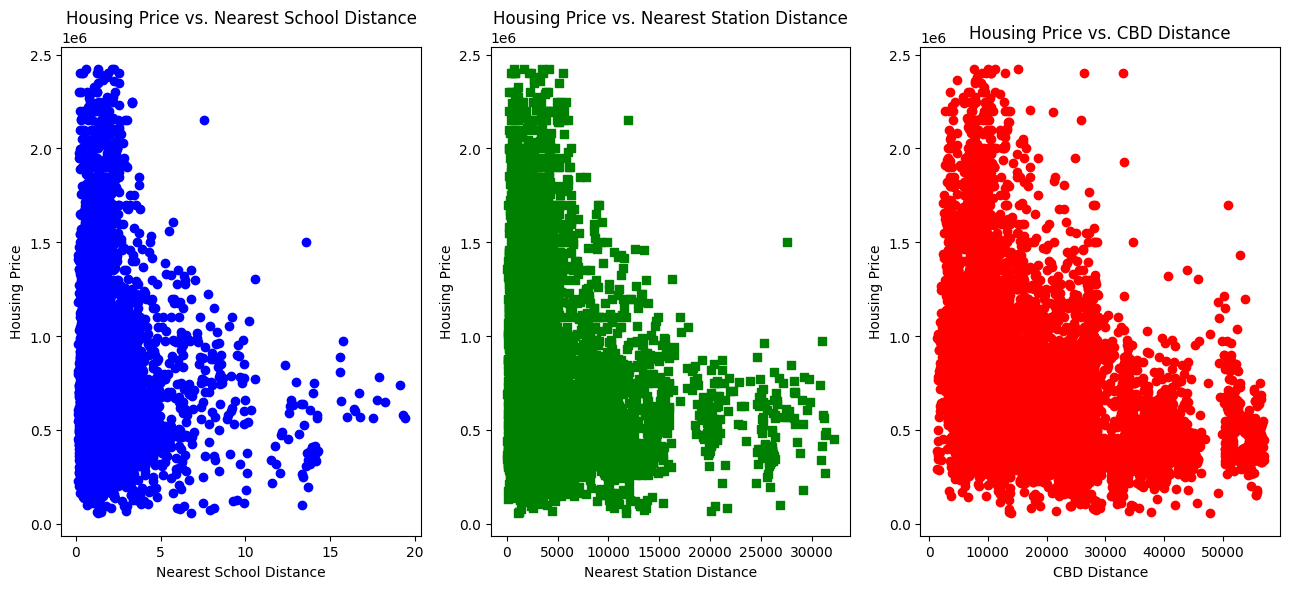

In [22]:


# Extract relevant columns
nearest_school_dist = all_data['NEAREST_SCH_DIST']
nearest_station_dist = all_data['NEAREST_STN_DIST']
cbd_dist = all_data['CBD_DIST']
prices = all_data['PRICE']

# Create separate scatter plots for each feature
plt.figure(figsize=(13, 6))

# Scatter plot for Nearest School Distance
plt.subplot(1, 3, 1)
plt.scatter(nearest_school_dist, prices, color='blue', marker='o')
plt.xlabel('Nearest School Distance')
plt.ylabel('Housing Price')
plt.title('Housing Price vs. Nearest School Distance')

# Scatter plot for Nearest Station Distance
plt.subplot(1, 3, 2)
plt.scatter(nearest_station_dist, prices, color='green', marker='s')
plt.xlabel('Nearest Station Distance')
plt.ylabel('Housing Price')
plt.title('Housing Price vs. Nearest Station Distance')

# Scatter plot for CBD Distance
plt.subplot(1, 3, 3)
plt.scatter(cbd_dist, prices, color='red', marker='o')
plt.xlabel('CBD Distance')
plt.ylabel('Housing Price')
plt.title('Housing Price vs. CBD Distance')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()




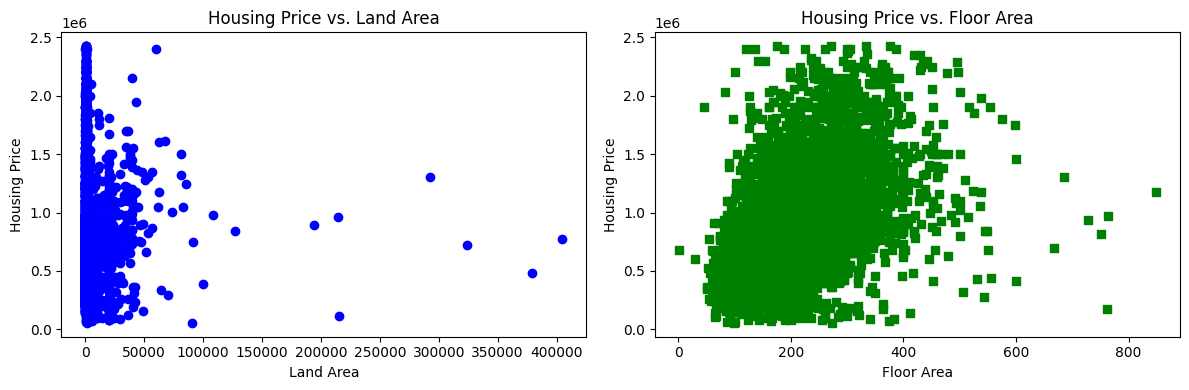

In [23]:
# Extract relevant columns
land_area = all_data['LAND_AREA']
floor_area = all_data['FLOOR_AREA']
prices = all_data['PRICE']

# Create separate scatter plots for each feature
plt.figure(figsize=(12, 4))

# Scatter plot for LAND_AREA
plt.subplot(1, 2, 1)
plt.scatter(land_area, prices, color='blue', marker='o')
plt.xlabel('Land Area')
plt.ylabel('Housing Price')
plt.title('Housing Price vs. Land Area')

# Scatter plot for FLOOR_AREA
plt.subplot(1, 2, 2)
plt.scatter(floor_area, prices, color='green', marker='s')
plt.xlabel('Floor Area')
plt.ylabel('Housing Price')
plt.title('Housing Price vs. Floor Area')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


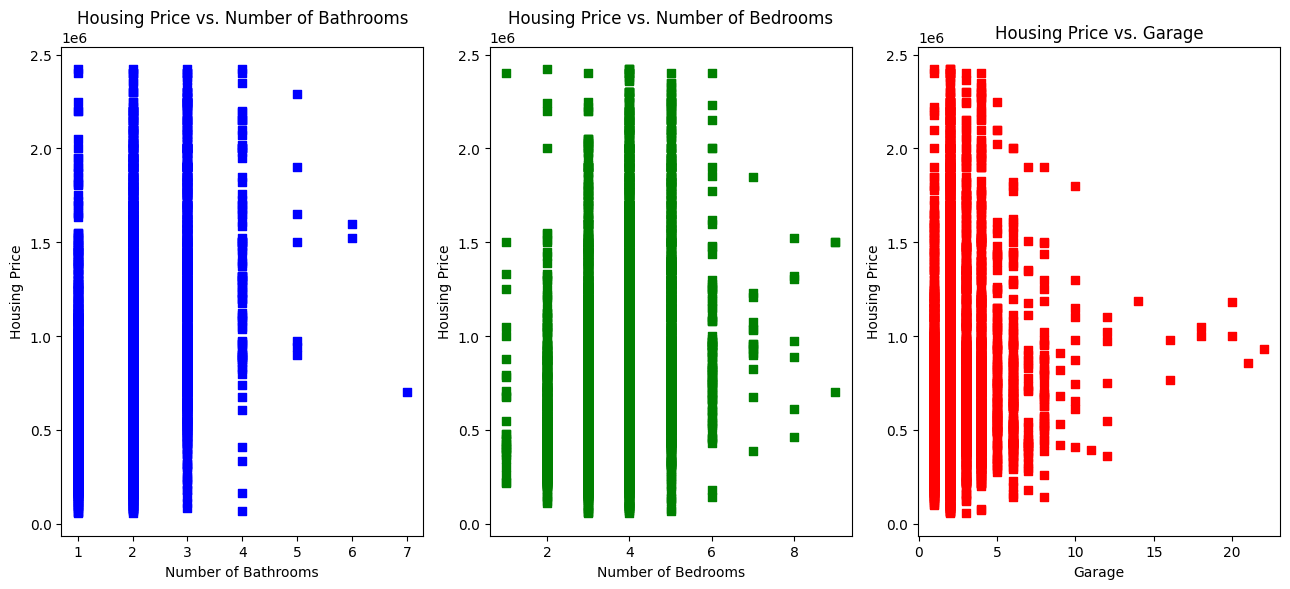

In [24]:
# Extract relevant columns
bathrooms = all_data['BATHROOMS']
bedrooms = all_data['BEDROOMS']
garage = all_data['GARAGE']
prices = all_data['PRICE']

# Create separate scatter plots for each feature
plt.figure(figsize=(13, 6))

# Scatter plot for BATHROOMS
plt.subplot(1, 3, 1)
plt.scatter(bathrooms, prices, color='blue', marker='s')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Housing Price')
plt.title('Housing Price vs. Number of Bathrooms')

# Scatter plot for BEDROOMS
plt.subplot(1, 3, 2)
plt.scatter(bedrooms, prices, color='green', marker='s')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Housing Price')
plt.title('Housing Price vs. Number of Bedrooms')

# Scatter plot for GARAGE
plt.subplot(1, 3, 3)
plt.scatter(garage, prices, color='red', marker='s')
plt.xlabel('Garage')
plt.ylabel('Housing Price')
plt.title('Housing Price vs. Garage')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [25]:
data1=all_data.drop(columns='ADDRESS', axis =1)
data1=data1.drop(columns='SUBURB', axis =1)
data1=data1.drop(columns='NEAREST_STN', axis =1)
data1=data1.drop(columns='DATE_SOLD', axis =1)
data1=data1.drop(columns='NEAREST_SCH', axis =1)
data1


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,287000,3,1,1,719,86,1979,22600,1900,6111,-32.120578,115.993579,1.649178,113
1,367500,3,2,2,398,158,2003,36300,2100,6036,-31.654280,115.702200,0.680843,39
2,685000,3,2,3,706,196,1985,12500,961,6149,-32.064580,115.860460,1.183363,89
3,570000,4,2,2,568,225,2003,15300,7000,6057,-31.952420,116.020700,2.746772,137
4,465000,4,2,2,450,173,2000,20700,1600,6164,-32.137680,115.866970,0.747108,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9728,1700000,4,3,4,414,277,2009,9400,558,6010,-31.981771,115.765149,0.762346,24
9729,423000,3,2,2,248,108,2011,24900,5700,6164,-32.176013,115.858357,3.607062,129
9730,467000,4,2,2,400,132,2014,17100,2500,6056,-31.872192,116.013543,1.116806,53
9731,955000,3,2,1,200,127,1997,16000,1900,6162,-32.066410,115.756070,1.134956,128


In [26]:
# Dividing dataset into label and feature sets
X = data1.drop(columns='PRICE', axis =1) #Features
Y = data1['PRICE'] #Labels
print(X)
print(Y)

      BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  \
0            3          1       1        719          86        1979   
1            3          2       2        398         158        2003   
2            3          2       3        706         196        1985   
3            4          2       2        568         225        2003   
4            4          2       2        450         173        2000   
...        ...        ...     ...        ...         ...         ...   
9728         4          3       4        414         277        2009   
9729         3          2       2        248         108        2011   
9730         4          2       2        400         132        2014   
9731         3          2       1        200         127        1997   
9732         4          3       2        292         245        2013   

      CBD_DIST  NEAREST_STN_DIST  POSTCODE   LATITUDE   LONGITUDE  \
0        22600              1900      6111 -32.120578  115.993579 

In [27]:
# splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(9733, 13) (7786, 13) (1947, 13)


In [29]:
# Linear Regression
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to test data
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train_scaled, Y_train)

# Make Predictions
linear_predictions = linear_model.predict(X_test_scaled)

# Evaluate Model
linear_rmse = mean_squared_error(Y_test, linear_predictions, squared=False)
linear_r2 = r2_score(Y_test, linear_predictions)

# Print Results
print("Linear Regression Results:")
print("Root Mean Squared Error:", linear_rmse)
print("R-squared:", linear_r2)


Linear Regression Results:
Root Mean Squared Error: 228158.10813212564
R-squared: 0.6617644528471305


In [31]:
# Gradient Boosting Regression Model

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, Y_train)

# Make Predictions
gb_tuned_predictions = grid_gb.predict(X_test)

# Evaluate Model
gb_tuned_rmse = mean_squared_error(Y_test, gb_tuned_predictions, squared=False)
gb_tuned_r2 = r2_score(Y_test, gb_tuned_predictions)

# Print Results
print("Gradient Boosting Regression Results:")
print("Best Parameters:", grid_gb.best_params_)

print("Root Mean Squared Error:", gb_tuned_rmse)
print("R-squared:", gb_tuned_r2)


Gradient Boosting Regression Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Root Mean Squared Error: 163124.99890611155
R-squared: 0.8271025939640579


In [32]:
# Random Forest Regression Model
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_rf = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search_rf.fit(X_train, Y_train)

# Make Predictions
rf_predictions = random_search_rf.predict(X_test)

# Evaluate Model
rf_rmse = mean_squared_error(Y_test, rf_predictions, squared=False)
rf_r2 = r2_score(Y_test, rf_predictions)

# Print Results
print("Random Forest Regression Results:")
print("Best Parameters:", random_search_rf.best_params_)
print("Root Mean Squared Error:", rf_rmse)
print("R-squared:", rf_r2)


Random Forest Regression Results:
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Root Mean Squared Error: 169572.88337178898
R-squared: 0.8131641363849995


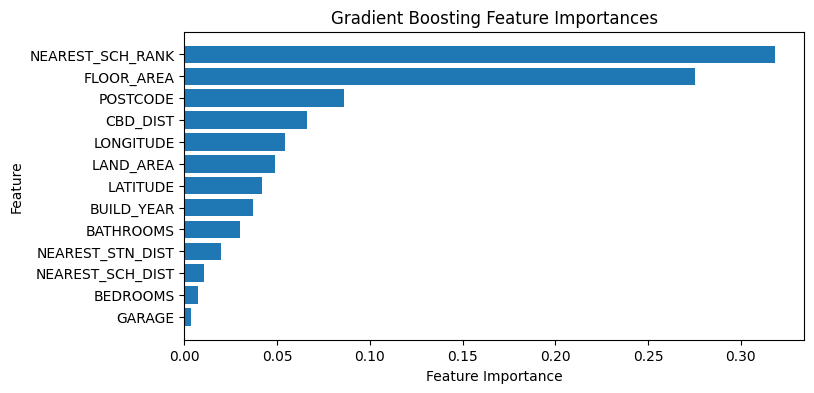

In [38]:
# Visualize Feature Importances
feature_importances = grid_gb.best_estimator_.feature_importances_
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(8, 4))
plt.barh(range(X.shape[1]), feature_importances[sorted_indices], tick_label=X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importances')
plt.show()

In [40]:
# Feature Importance Analysis
feature_importances = grid_gb.best_estimator_.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances table
print("Gradient Boosting Feature Importances:")
print(feature_importance_df)


Gradient Boosting Feature Importances:
             Feature  Importance
12  NEAREST_SCH_RANK    0.318397
4         FLOOR_AREA    0.275061
8           POSTCODE    0.086315
6           CBD_DIST    0.066345
10         LONGITUDE    0.054387
3          LAND_AREA    0.049079
9           LATITUDE    0.041928
5         BUILD_YEAR    0.037224
1          BATHROOMS    0.030108
7   NEAREST_STN_DIST    0.019513
11  NEAREST_SCH_DIST    0.010729
0           BEDROOMS    0.007381
2             GARAGE    0.003533


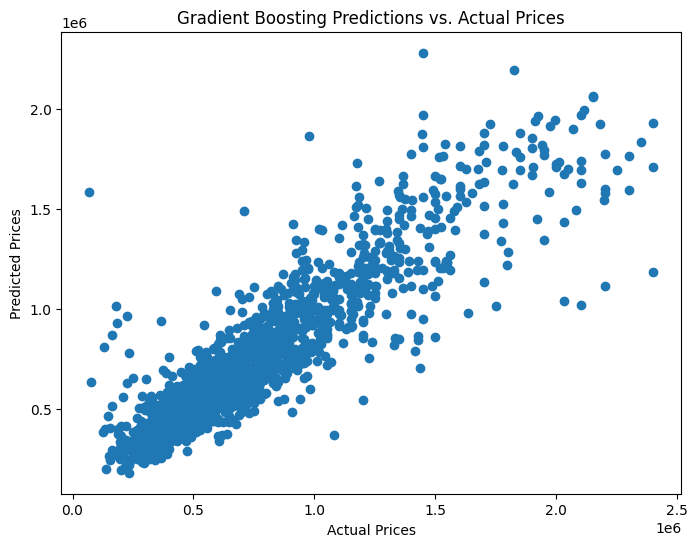

In [41]:
# Visualize Predictions vs. Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, gb_tuned_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting Predictions vs. Actual Prices')
plt.show()